<a href="https://colab.research.google.com/github/TonioHathos/AI_Valeo/blob/main/Pre_processing_dataset_yudi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration des données


# Avant Première presentation

In [1]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files
import missingno as msno

from pandas.plotting import scatter_matrix


Télechargement du dataset

*texte en italique*# Nouvelle section

In [2]:
! rm -f *.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
! wget https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/trainingoutput.csv

--2023-05-23 12:47:55--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/testinputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795776 (777K) [text/plain]
Saving to: ‘testinputs.csv’

testinputs.csv      100%[===================>] 777.12K  --.-KB/s    in 0.05s   

2023-05-23 12:47:56 (16.6 MB/s) - ‘testinputs.csv’ saved [795776/795776]

--2023-05-23 12:47:56--  https://raw.githubusercontent.com/TonioHathos/AI_Valeo/master/traininginputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3432084 (3.3M) [text/

In [3]:
!ls

sample_data  testinputs.csv  traininginputs.csv  trainingoutput.csv


In [4]:
df_test_inputs = pd.read_csv('testinputs.csv')
df_training_inputs = pd.read_csv('traininginputs.csv')
df_training_output = pd.read_csv('trainingoutput.csv')


**Training Inputs**

In [5]:
df_training_inputs.shape

(34515, 14)

Changement des noms

In [6]:
df_training_inputs.rename(columns={'OP120_Rodage_U_mesure_value': 'Rodage_U','OP120_Rodage_I_mesure_value': 'Rodage_I','OP070_V_1_angle_value': 'Premier angle','OP070_V_2_torque_value': 'V2_torque','OP090_SnapRingMidPointForce_val': 'SnapRingMidPointForce','OP110_Vissage_M8_angle_value': 'Vissage_M8_angle','OP090_StartLinePeakForce_value': 'StartLinePeakForce','OP070_V_1_torque_value': 'V1_torque','OP100_Capuchon_insertion_mesure': 'Capuchon_insertion','OP110_Vissage_M8_torque_value': 'Vissage_M8_torque','OP090_SnapRingFinalStroke_value': 'SnapRingFinalStroke','OP090_SnapRingPeakForce_value': 'SnapRingPeakForce','OP070_V_2_angle_value': 'Deuxième angle'}, inplace=True)


In [7]:
df_training_inputs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROC_TRACEINFO         34515 non-null  object 
 1   Premier angle          34515 non-null  float64
 2   SnapRingPeakForce      34515 non-null  float64
 3   Deuxième angle         34515 non-null  float64
 4   Rodage_I               34515 non-null  float64
 5   SnapRingFinalStroke    34515 non-null  float64
 6   Vissage_M8_torque      34515 non-null  float64
 7   Capuchon_insertion     15888 non-null  float64
 8   Rodage_U               34515 non-null  float64
 9   V1_torque              34515 non-null  float64
 10  StartLinePeakForce     34515 non-null  float64
 11  Vissage_M8_angle       34515 non-null  float64
 12  SnapRingMidPointForce  34515 non-null  float64
 13  V2_torque              34515 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.7+ MB


In [8]:
with pd.option_context('display.max_columns', df_training_inputs.shape[1]):
    print(df_training_inputs.describe(include='all'))

                    PROC_TRACEINFO  Premier angle  SnapRingPeakForce  \
count                        34515   34515.000000       34515.000000   
unique                       34515            NaN                NaN   
top     I-B-XA1207672-190429-00688            NaN                NaN   
freq                             1            NaN                NaN   
mean                           NaN     159.906922         156.915055   
std                            NaN      15.662650          11.271492   
min                            NaN     101.800000           0.000000   
25%                            NaN     148.700000         149.210000   
50%                            NaN     158.000000         156.180000   
75%                            NaN     169.300000         164.380000   
max                            NaN     198.300000         196.920000   

        Deuxième angle      Rodage_I  SnapRingFinalStroke  Vissage_M8_torque  \
count     34515.000000  34515.000000         34515.0000

**Test Inputs**

In [9]:
df_test_inputs.shape

(8001, 14)

In [10]:
df_test_inputs_cleaned = df_test_inputs.drop(columns=["PROC_TRACEINFO"])


In [11]:
df_test_inputs.rename(columns={'OP120_Rodage_U_mesure_value': 'Rodage_U','OP120_Rodage_I_mesure_value': 'Rodage_I','OP070_V_1_angle_value': 'Premier angle','OP070_V_2_torque_value': 'V2_torque','OP090_SnapRingMidPointForce_val': 'SnapRingMidPointForce','OP110_Vissage_M8_angle_value': 'Vissage_M8_angle','OP090_StartLinePeakForce_value': 'StartLinePeakForce','OP070_V_1_torque_value': 'V1_torque','OP100_Capuchon_insertion_mesure': 'Capuchon_insertion','OP110_Vissage_M8_torque_value': 'Vissage_M8_torque','OP090_SnapRingFinalStroke_value': 'SnapRingFinalStroke','OP090_SnapRingPeakForce_value': 'SnapRingPeakForce','OP070_V_2_angle_value': 'Deuxième angle'}, inplace=True)


In [12]:
df_test_inputs.describe()

,Premier angle,SnapRingPeakForce,Deuxième angle,Rodage_I,SnapRingFinalStroke,Vissage_M8_torque,Capuchon_insertion,Rodage_U,V1_torque,StartLinePeakForce,Vissage_M8_angle,SnapRingMidPointForce,V2_torque
count,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,8001.000000,3641.000000,8001.000000,8001.000000,8001.00000,8001.000000,8001.000000,8001.000000
mean,159.849919,156.836130,159.678965,113.379749,11.968191,12.254094,0.388753,11.971056,6.548061,23.58853,17.929671,97.607625,6.549979
std,15.624188,11.683895,15.238943,3.547692,0.266558,0.145903,0.024336,0.003082,0.097780,2.57426,6.709905,7.023431,0.095063
min,101.900000,0.000000,103.500000,102.420000,0.000000,0.570000,0.250000,11.970000,5.810000,0.00000,0.000000,0.000000,5.900000
25%,148.500000,148.970000,149.500000,111.090000,11.850000,12.210000,0.380000,11.970000,6.410000,22.23000,13.600000,94.290000,6.420000
50%,158.000000,156.220000,158.700000,113.200000,12.040000,12.250000,0.390000,11.970000,6.610000,23.82000,16.500000,98.410000,6.610000
75%,169.100000,164.490000,168.900000,115.370000,12.080000,12.300000,0.410000,11.970000,6.620000,25.24000,20.200000,102.230000,6.610000
max,198.200000,191.340000,198.000000,186.310000,12.150000,12.500000,0.420000,11.990000,6.660000,36.43000,72.600000,133.550000,6.680000


In [13]:
df_test_inputs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8001 entries, 0 to 8000
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROC_TRACEINFO         8001 non-null   object 
 1   Premier angle          8001 non-null   float64
 2   SnapRingPeakForce      8001 non-null   float64
 3   Deuxième angle         8001 non-null   float64
 4   Rodage_I               8001 non-null   float64
 5   SnapRingFinalStroke    8001 non-null   float64
 6   Vissage_M8_torque      8001 non-null   float64
 7   Capuchon_insertion     3641 non-null   float64
 8   Rodage_U               8001 non-null   float64
 9   V1_torque              8001 non-null   float64
 10  StartLinePeakForce     8001 non-null   float64
 11  Vissage_M8_angle       8001 non-null   float64
 12  SnapRingMidPointForce  8001 non-null   float64
 13  V2_torque              8001 non-null   float64
dtypes: float64(13), object(1)
memory usage: 875.2+ KB


In [14]:
with pd.option_context('display.max_columns', df_test_inputs.shape[1]):
    print(df_test_inputs.describe(include='all'))

                    PROC_TRACEINFO  Premier angle  SnapRingPeakForce  \
count                         8001    8001.000000        8001.000000   
unique                        8001            NaN                NaN   
top     I-B-XA1207672-190520-00632            NaN                NaN   
freq                             1            NaN                NaN   
mean                           NaN     159.849919         156.836130   
std                            NaN      15.624188          11.683895   
min                            NaN     101.900000           0.000000   
25%                            NaN     148.500000         148.970000   
50%                            NaN     158.000000         156.220000   
75%                            NaN     169.100000         164.490000   
max                            NaN     198.200000         191.340000   

        Deuxième angle     Rodage_I  SnapRingFinalStroke  Vissage_M8_torque  \
count      8001.000000  8001.000000          8001.000000

**Training output**

In [15]:
df_training_output.shape

(34515, 2)

In [16]:
df_training_output.describe()

,Binar OP130_Resultat_Global_v
count,34515.000000
mean,0.008837
std,0.093589
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [17]:
df_training_output.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PROC_TRACEINFO                 34515 non-null  object
 1   Binar OP130_Resultat_Global_v  34515 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 539.4+ KB


In [18]:
with pd.option_context('display.max_columns', df_training_output.shape[1]):
    print(df_training_output.describe(include='all'))
     

                    PROC_TRACEINFO  Binar OP130_Resultat_Global_v
count                        34515                   34515.000000
unique                       34515                            NaN
top     I-B-XA1207672-190429-00688                            NaN
freq                             1                            NaN
mean                           NaN                       0.008837
std                            NaN                       0.093589
min                            NaN                       0.000000
25%                            NaN                       0.000000
50%                            NaN                       0.000000
75%                            NaN                       0.000000
max                            NaN                       1.000000


**Histograme de chaqu'un**

Histogram Training input

array([[<Axes: title={'center': 'Premier angle'}>,
        <Axes: title={'center': 'SnapRingPeakForce'}>,
        <Axes: title={'center': 'Deuxième angle'}>,
        <Axes: title={'center': 'Rodage_I'}>],
       [<Axes: title={'center': 'SnapRingFinalStroke'}>,
        <Axes: title={'center': 'Vissage_M8_torque'}>,
        <Axes: title={'center': 'Capuchon_insertion'}>,
        <Axes: title={'center': 'Rodage_U'}>],
       [<Axes: title={'center': 'V1_torque'}>,
        <Axes: title={'center': 'StartLinePeakForce'}>,
        <Axes: title={'center': 'Vissage_M8_angle'}>,
        <Axes: title={'center': 'SnapRingMidPointForce'}>],
       [<Axes: title={'center': 'V2_torque'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

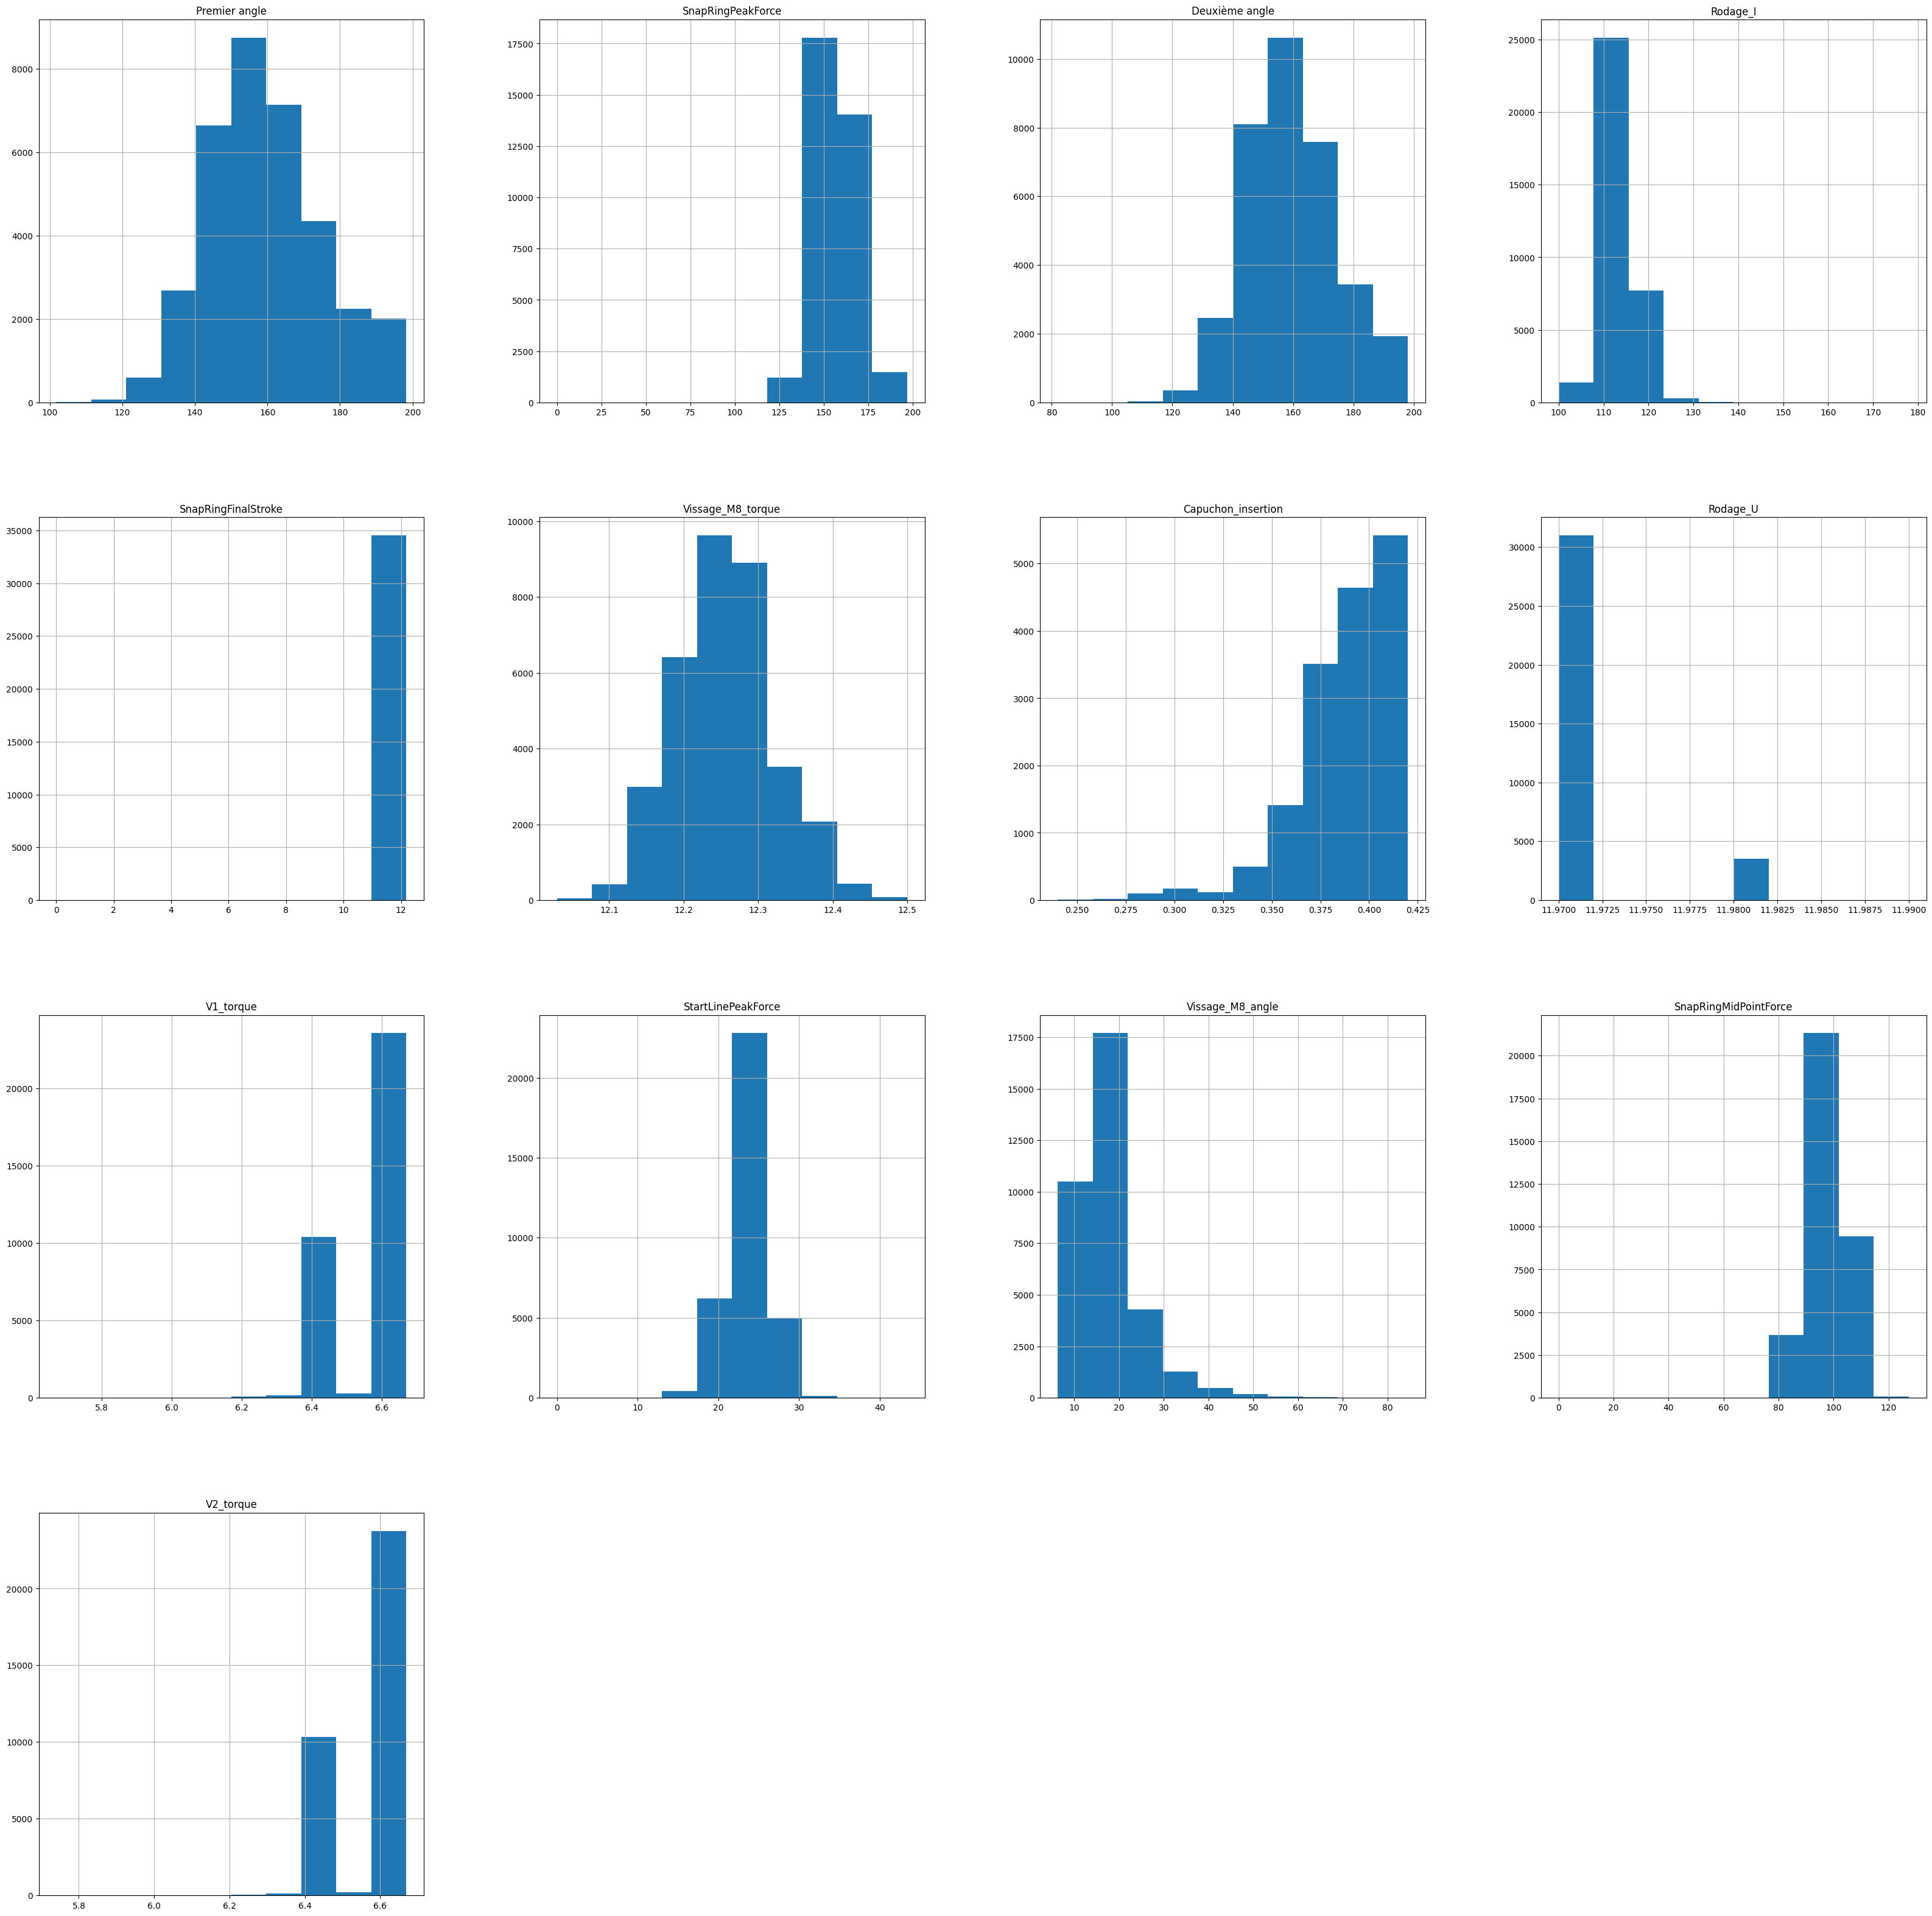

In [19]:
df_training_inputs.hist(layout = (4 , 4), figsize = (40,40))

Histogram Test Input

array([[<Axes: title={'center': 'Premier angle'}>,
        <Axes: title={'center': 'SnapRingPeakForce'}>,
        <Axes: title={'center': 'Deuxième angle'}>,
        <Axes: title={'center': 'Rodage_I'}>],
       [<Axes: title={'center': 'SnapRingFinalStroke'}>,
        <Axes: title={'center': 'Vissage_M8_torque'}>,
        <Axes: title={'center': 'Capuchon_insertion'}>,
        <Axes: title={'center': 'Rodage_U'}>],
       [<Axes: title={'center': 'V1_torque'}>,
        <Axes: title={'center': 'StartLinePeakForce'}>,
        <Axes: title={'center': 'Vissage_M8_angle'}>,
        <Axes: title={'center': 'SnapRingMidPointForce'}>],
       [<Axes: title={'center': 'V2_torque'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

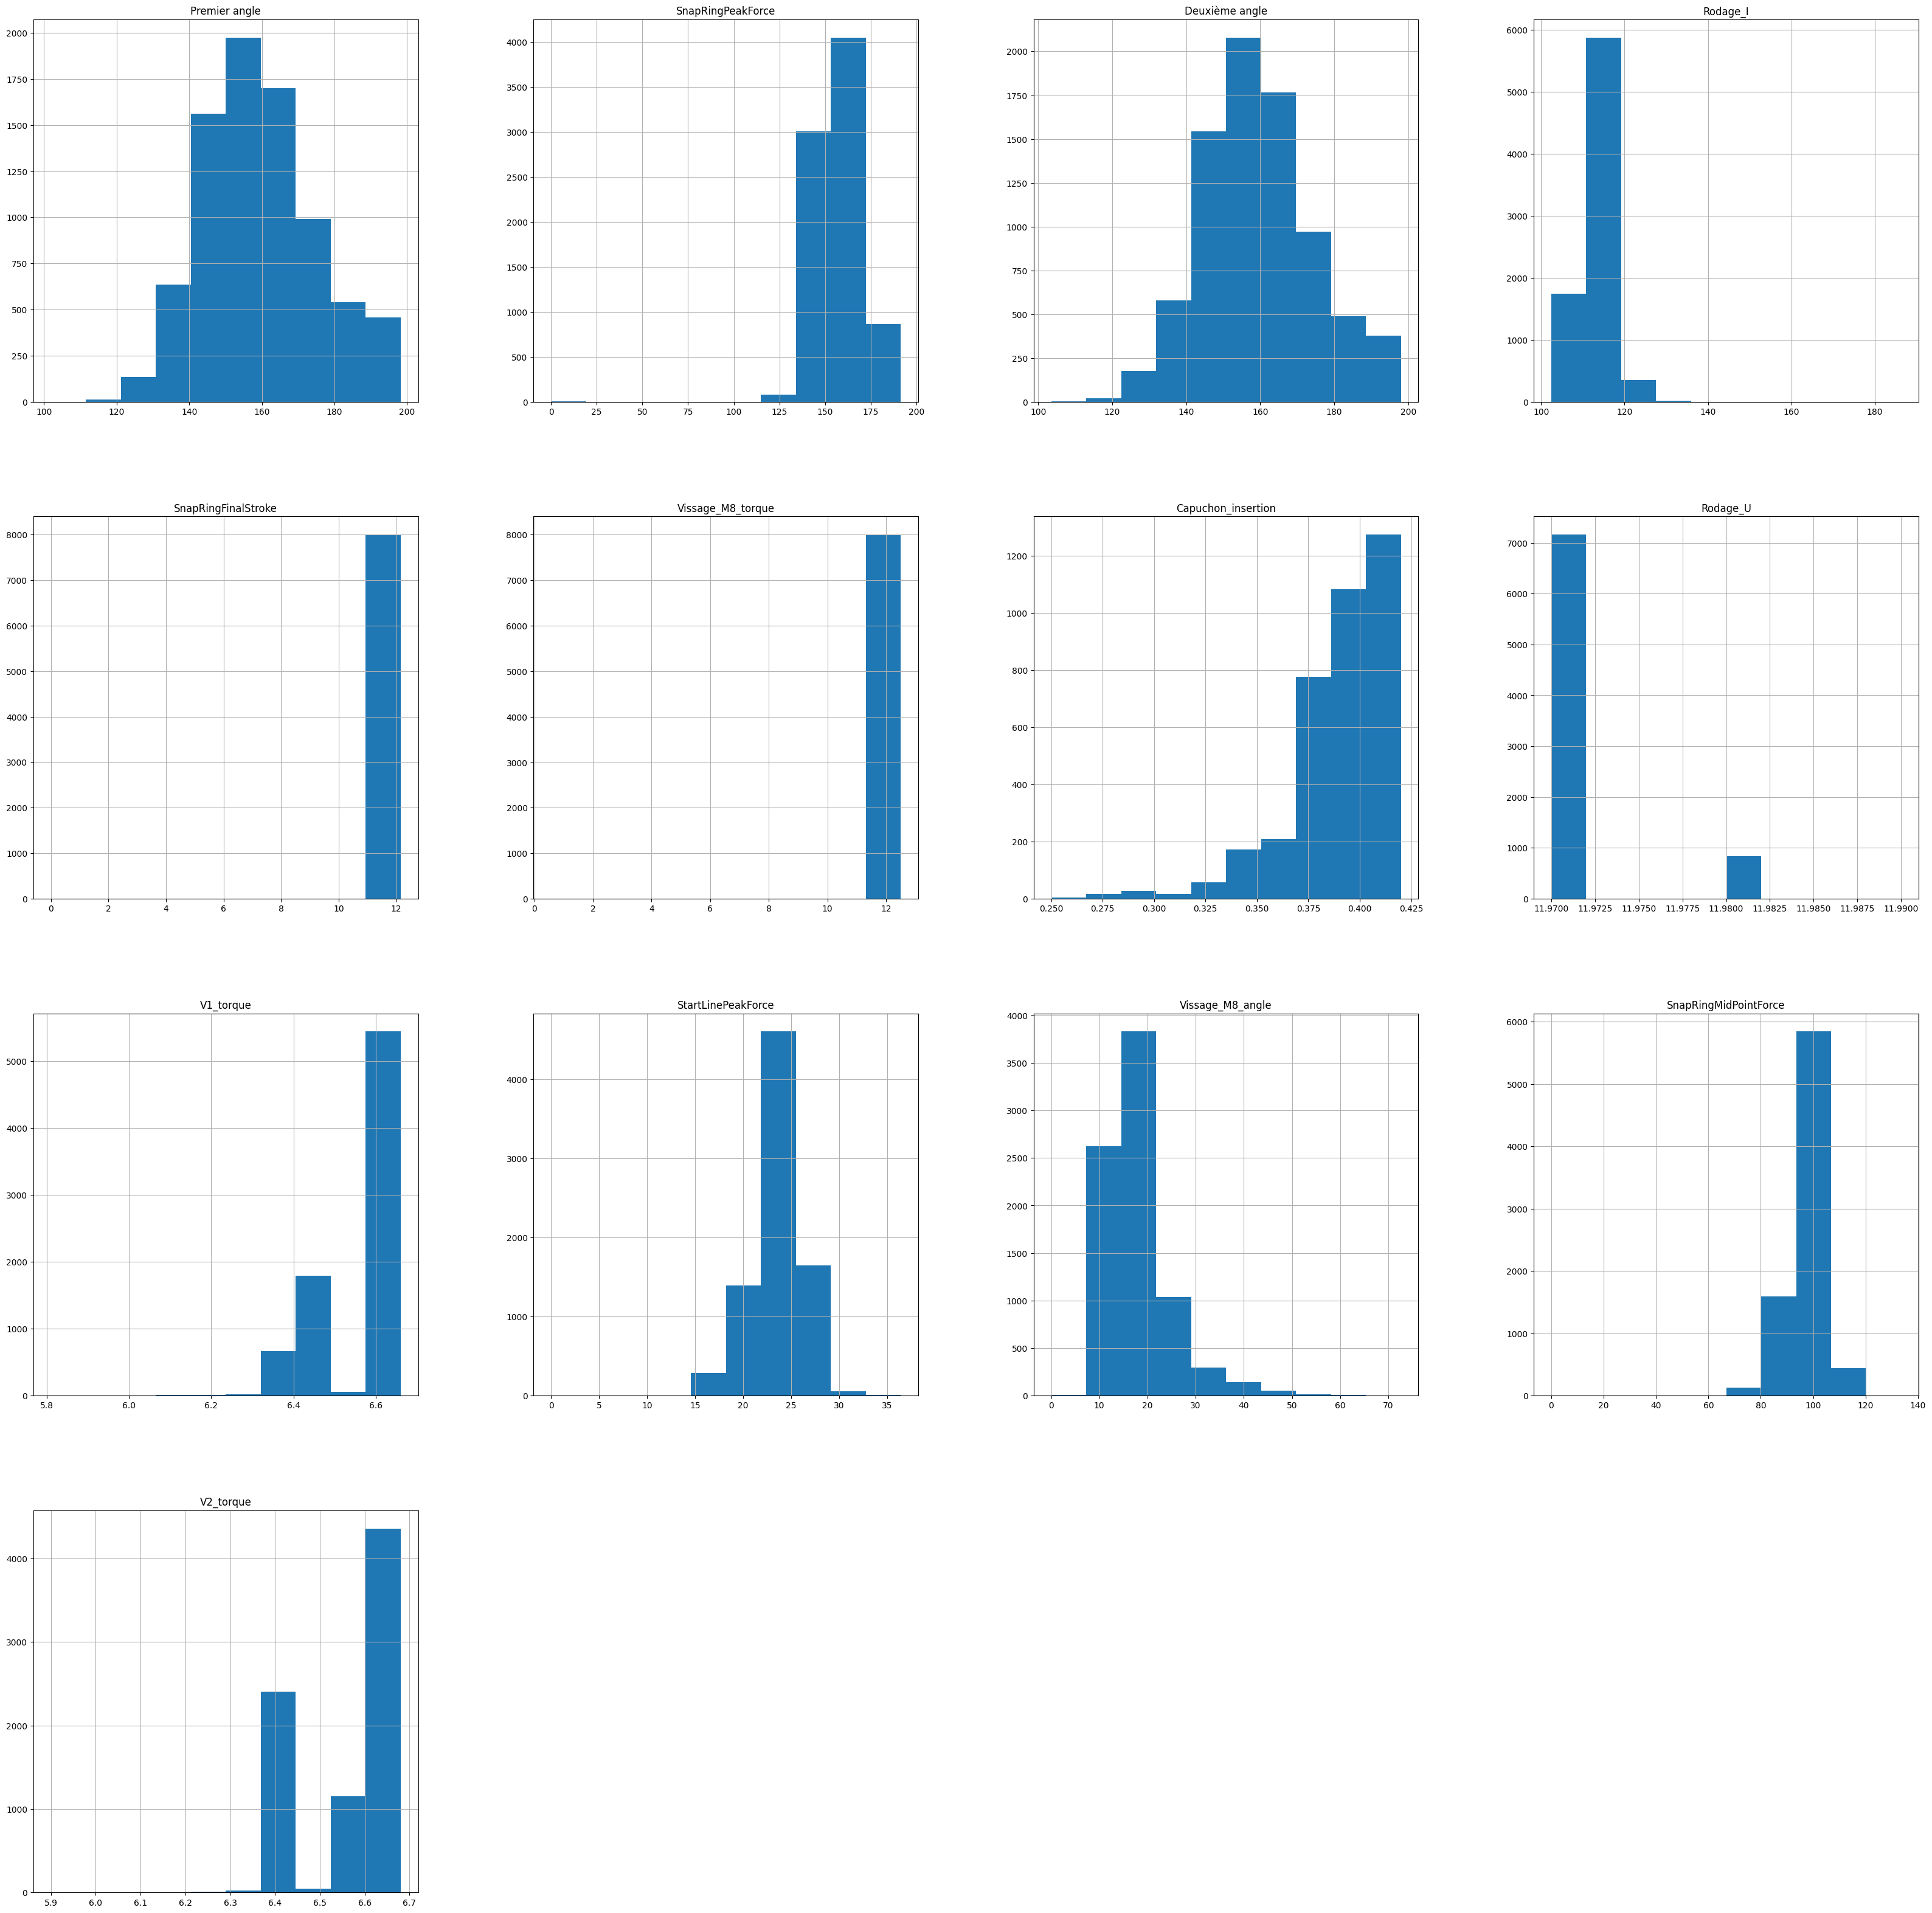

In [20]:
df_test_inputs.hist(layout = (4, 4), figsize = (40,40))

Histogram Training outputs

array([[<Axes: title={'center': 'Binar OP130_Resultat_Global_v'}>,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

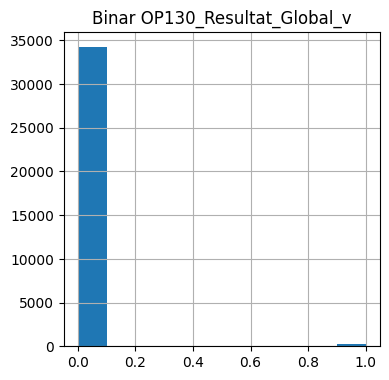

In [21]:
df_training_output.hist(layout = (4, 4), figsize = (20,20))

**BoxPlot**

Training Inputs

In [22]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

--2023-05-23 12:48:19--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.72K  --.-KB/s    in 0s      

2023-05-23 12:48:19 (75.9 MB/s) - ‘visualization.py’ saved [13023/13023]

--2023-05-23 12:48:20--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connect

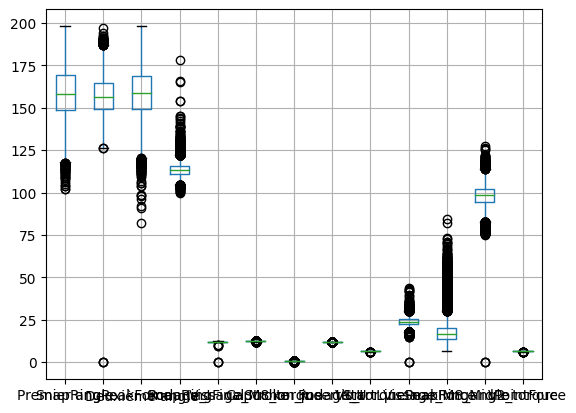

In [23]:
bp = df_training_inputs.boxplot()

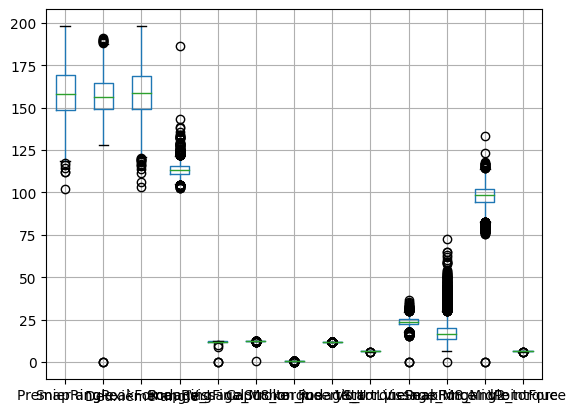

In [24]:
ax = df_test_inputs.boxplot()
#visualization.rotate_labels(ax)
plt.show()

Scaling features

In [25]:
from sklearn.preprocessing import StandardScaler

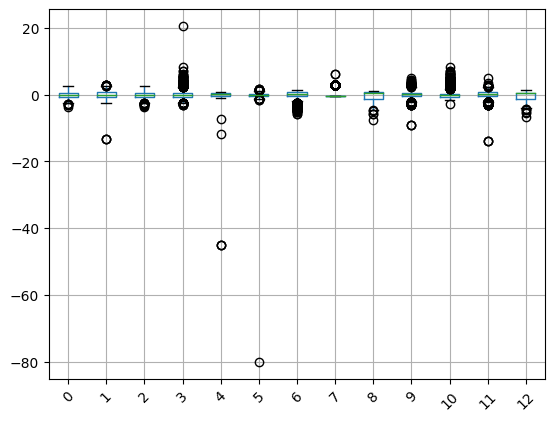

In [26]:
scaler = StandardScaler()
X = df_test_inputs_cleaned.values
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled)
bp = df_scaled.boxplot()
bp.tick_params(axis='x', labelrotation=45)

Scatter Matrix

**Definition des columns qui ont necessité de transformation**

In [27]:
cols_change = ['Vissage_M8_angle','SnapRingFinalStroke']
#df_training_inputs


Columns qui n'ont rien changé

In [28]:
cols_Nchange = ['Rodage_U', 'V1_torque','Rodage_I','V2_torque','SnapRingMidPointForce', 'Premier angle', 'SnapRingPeakForce','Deuxième angle', 'Vissage_M8_torque','Capuchon_insertion','StartLinePeakForce']
#df_training_inputs

Definition des changements

In [29]:
cols_to_transform = ['Vissage_M8_angle'];

cols_transformed = [s + "_log" for s in cols_to_transform]
df_training_inputs[cols_transformed] = df_training_inputs[cols_to_transform].transform(
                        func=lambda x : np.log(x))


In [30]:
cols_to_transform1 = ['SnapRingFinalStroke']
cols_transformed1 = [s + "_exp" for s in cols_to_transform1]

df_training_inputs[cols_transformed1] = df_training_inputs[cols_to_transform1].transform(
    func=lambda x: np.exp(1+x))


Definition des columns dejà changé

In [31]:
cols_change_transf = cols_transformed + cols_transformed1
#df_training_inputs[cols_change_transf]

In [32]:
cols_to_plot = cols_Nchange + cols_change_transf
#df_training_inputs[columns_to_plot]
cols_to_plot

['Rodage_U',
 'V1_torque',
 'Rodage_I',
 'V2_torque',
 'SnapRingMidPointForce',
 'Premier angle',
 'SnapRingPeakForce',
 'Deuxième angle',
 'Vissage_M8_torque',
 'Capuchon_insertion',
 'StartLinePeakForce',
 'Vissage_M8_angle_log',
 'SnapRingFinalStroke_exp']

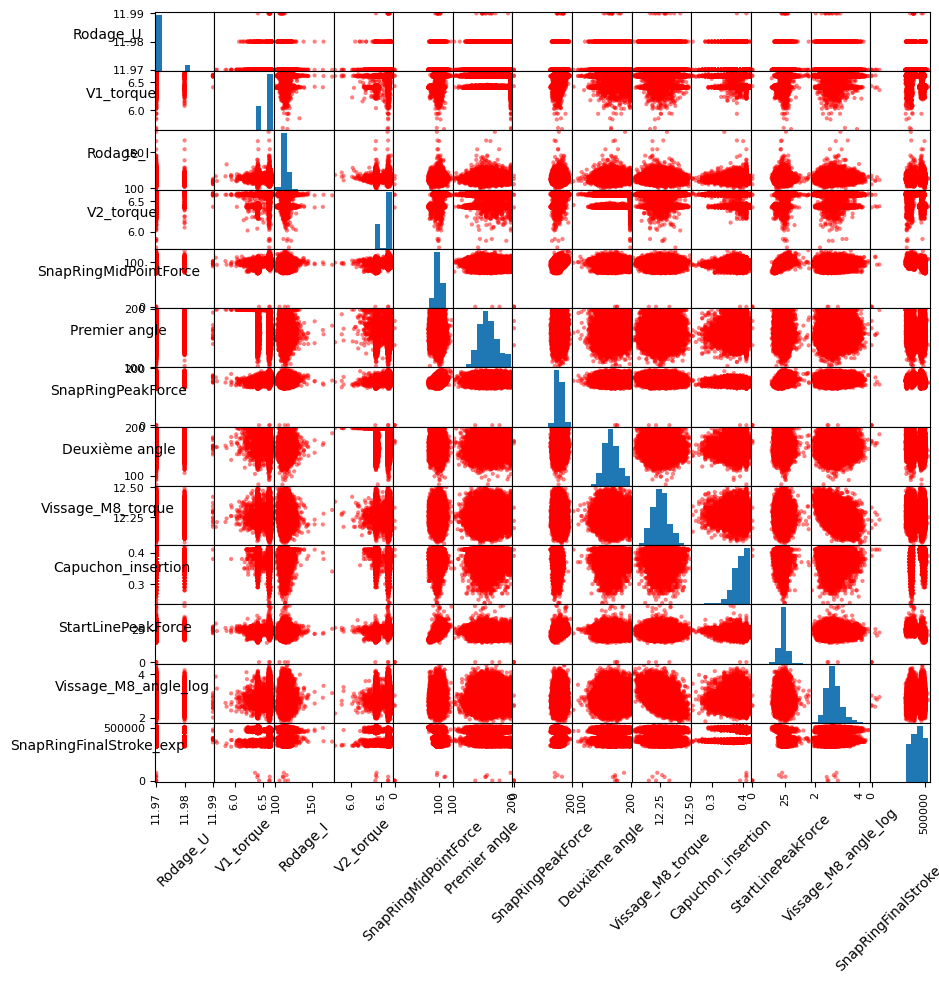

In [33]:
sm = scatter_matrix(df_training_inputs[cols_to_plot], figsize=(10, 10), alpha = 0.5, color = 'red')

visualization.rotate_labels(sm)
plt.show()

Amellioration de la visu

Visualization de caracteristique à changer

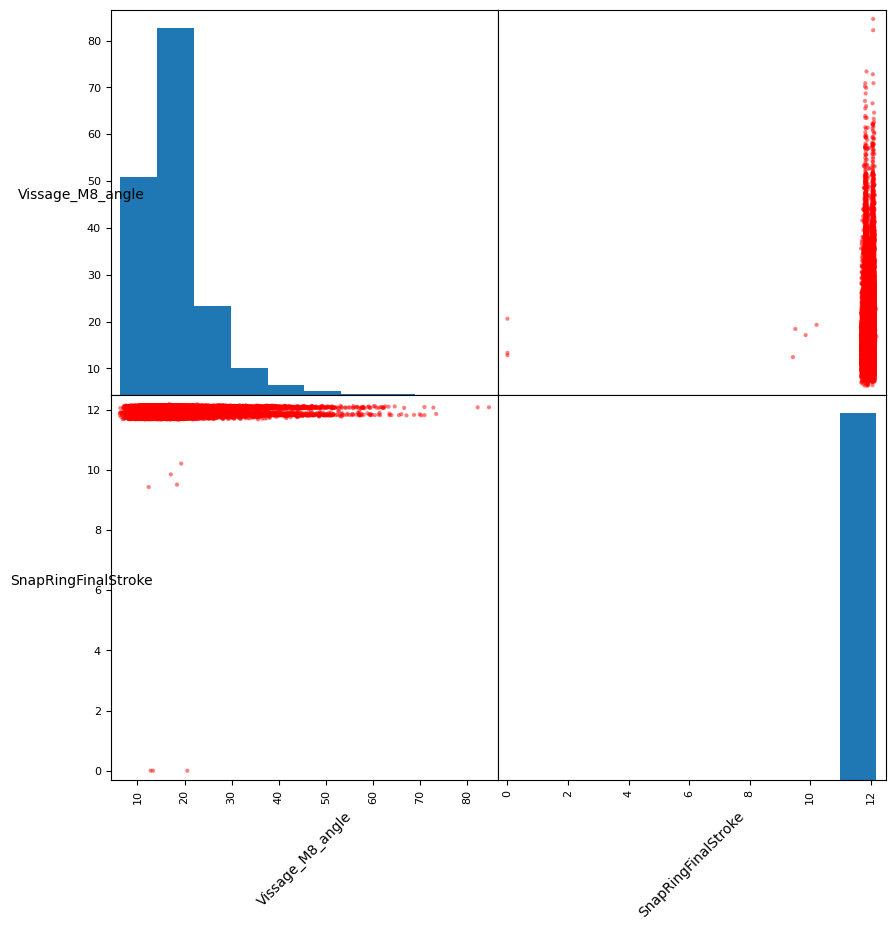

In [34]:
sm = scatter_matrix(df_training_inputs[cols_change],
                   figsize=(10,10), color = 'red')
visualization.rotate_labels(sm)
plt.show()

Sm des paramètres changés

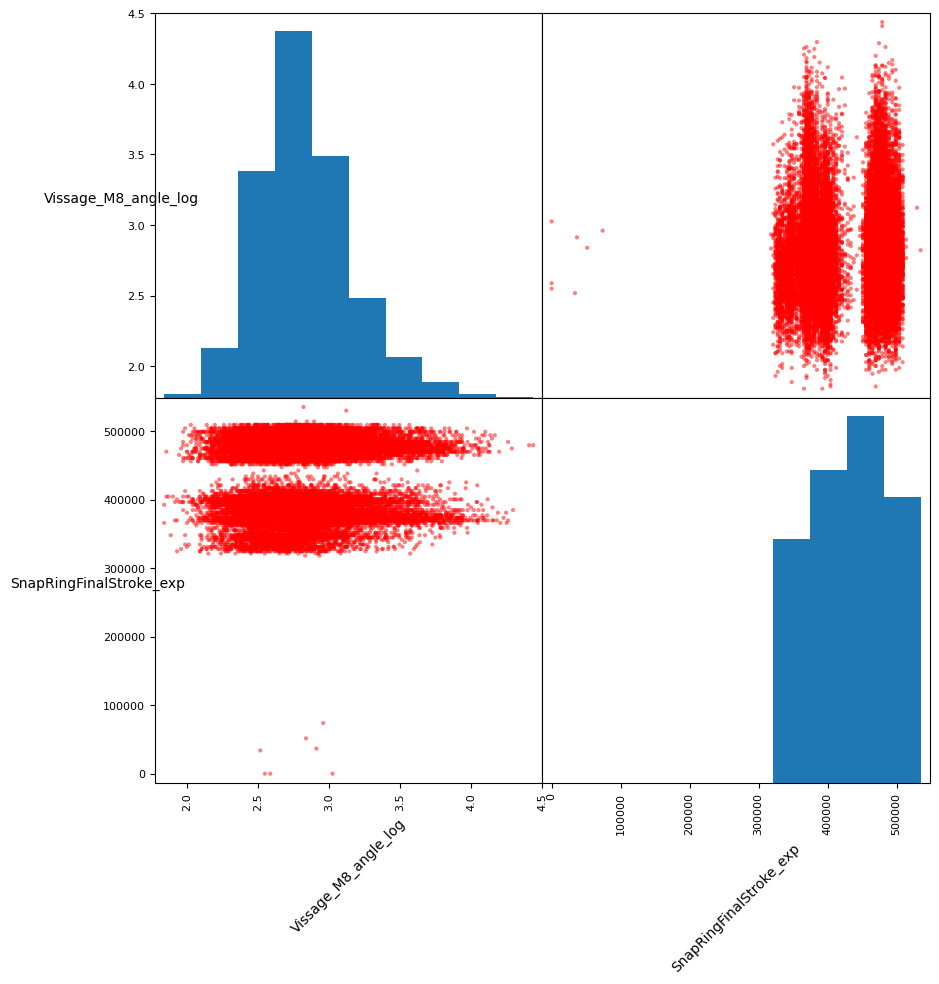

In [35]:
sm = scatter_matrix(df_training_inputs[cols_change_transf],
                   figsize=(10,10), color='red')

visualization.rotate_labels(sm)
plt.show()

In [36]:
feature_engineering.get_features_correlated_to_target(df_training_inputs,
                                    target_feature='Premier angle').head(10)

/content/feature_engineering.py:79: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = df.corr().round(2)


Premier angle              1.00
Deuxième angle             0.19
SnapRingFinalStroke_exp   -0.11
SnapRingFinalStroke       -0.09
SnapRingMidPointForce      0.07
V2_torque                  0.07
StartLinePeakForce         0.06
Rodage_I                   0.04
Vissage_M8_torque         -0.02
Capuchon_insertion        -0.02
Name: Premier angle, dtype: float64

Tentativa inútil


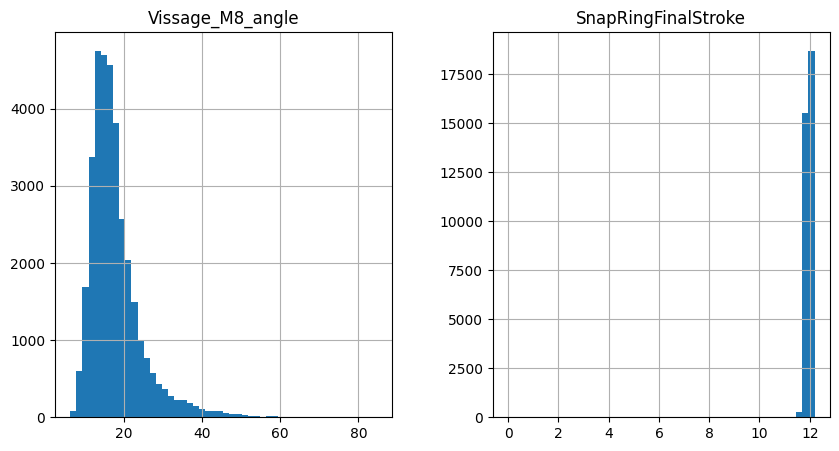

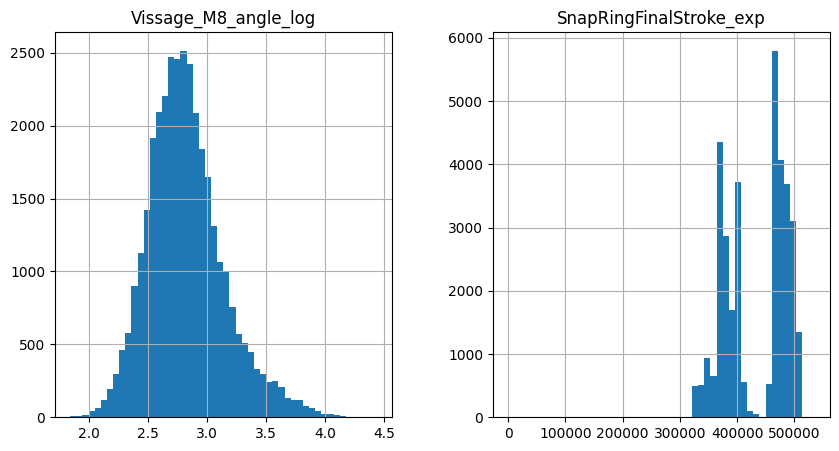

In [37]:
df_training_inputs[cols_change].hist(bins=50, figsize = (10,5))
plt.show()

df_training_inputs[cols_change_transf].hist(bins=50, figsize = (10,5))
plt.show()

# Modifier le dataset

Modification des NAN pour 0 et les valeurs presents pour 1

In [38]:
df_training_inputs['Capuchon_insertion'] = df_training_inputs['Capuchon_insertion'].fillna(0)

# Substitua os valores não nulos por 1
df_training_inputs['Capuchon_insertion'] = df_training_inputs['Capuchon_insertion'].apply(lambda x: 1 if x != 0 else x)



Suppression de la colonne PROC_TRACEINFO

In [39]:
df_training_inputs = pd.merge(df_training_inputs, df_training_output, on='PROC_TRACEINFO')
df_training_inputs = df_training_inputs.drop(columns=["PROC_TRACEINFO"])


In [ ]:
df_training_output.describe()

Groupe des toute les colonnes d'interrêt

In [40]:
cols_to_plot2 = cols_to_plot + ['Binar OP130_Resultat_Global_v']

Visu sur les colonnes changées 

In [41]:
df_training_inputs[cols_change + cols_change_transf].describe()

,Vissage_M8_angle,SnapRingFinalStroke,Vissage_M8_angle_log,SnapRingFinalStroke_exp
count,34515.000000,34515.000000,34515.000000,34515.000000
mean,17.878398,11.970190,2.826255,433255.325067
std,6.785079,0.169873,0.325871,53512.641384
min,6.300000,0.000000,1.840550,2.718282
25%,13.500000,11.850000,2.602690,380788.735379
50%,16.400000,12.040000,2.797281,460468.625050
75%,20.200000,12.080000,3.005683,479260.706129
max,84.600000,12.190000,4.437934,534988.216285


In [ ]:
msno.matrix(df_training_inputs)

Modifications sur V1 et V2 torque 


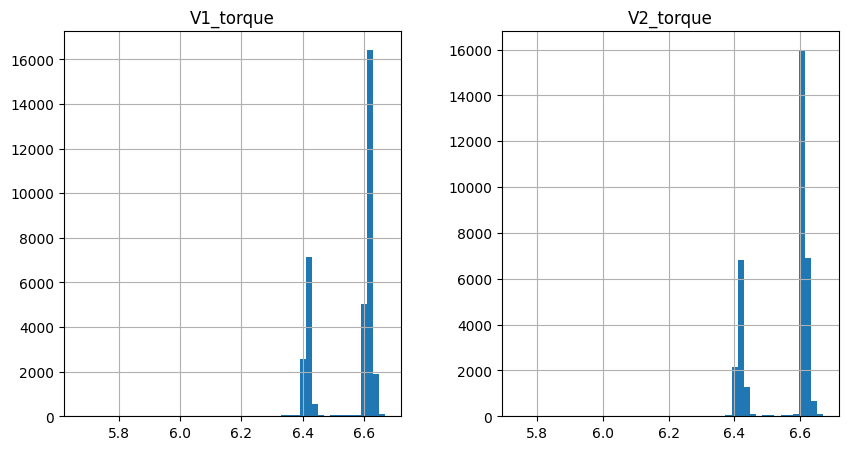

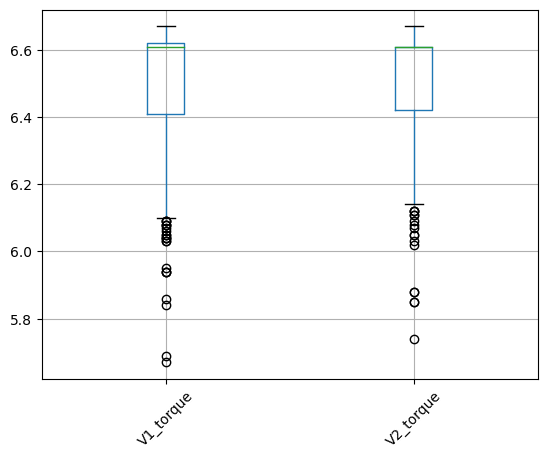

In [42]:
df_training_inputs[['V1_torque', 'V2_torque']].hist(bins=50, figsize = (10,5))
plt.show()

ax = df_training_inputs[['V1_torque', 'V2_torque']].boxplot()
ax.tick_params(axis='x', labelrotation=45)


In [43]:
df_training_inputs[['V1_torque']].value_counts()

V1_torque
6.61         8445
6.62         7987
6.41         5992
6.60         4987
6.40         2554
             ... 
6.06            1
5.95            1
5.86            1
5.84            1
6.67            1
Length: 70, dtype: int64

In [44]:
df_training_inputs['V1_torque'] = np.where(df_training_inputs['V1_torque'] <= 6.5, 0, 1)

df_training_inputs[['V1_torque']].value_counts()

V1_torque
1            23768
0            10747
dtype: int64

In [45]:
df_training_inputs[['V2_torque']].value_counts()

V2_torque
6.61         11265
6.41          5160
6.60          4731
6.62          3813
6.63          3102
             ...  
6.08             1
6.09             1
6.17             1
6.18             1
5.74             1
Length: 64, dtype: int64

In [46]:
df_training_inputs['V2_torque'] = np.where(df_training_inputs['V2_torque'] <= 6.5, 0, 1)

df_training_inputs[['V2_torque']].value_counts()

V2_torque
1            23935
0            10580
dtype: int64

Il faut modifier le Rodage_U aussi, car il a juste 3 valeurs

In [47]:
df_training_inputs[['Rodage_U']].value_counts()

Rodage_U
11.97       30983
11.98        3518
11.99          14
dtype: int64

In [48]:
df_training_inputs[['Binar OP130_Resultat_Global_v']].value_counts()

Binar OP130_Resultat_Global_v
0                                34210
1                                  305
dtype: int64

En regardant les chiffres des resultats, on ne peut pas supprimer ou generaliser le valeurs 11.99 parce que la quantité de erreurs dans le resultat global n'est pas trop different

In [ ]:
#df_training_inputs['Rodage_U'] = np.where(df_training_inputs['Rodage_U'] == 11.97, 0, 1)
df_training_inputs['Rodage_U'] = df_training_inputs['Rodage_U'].map({10: 11.99, 5: 11.98, 0: 11.97})


pas finis encore

Confirmation des modifications

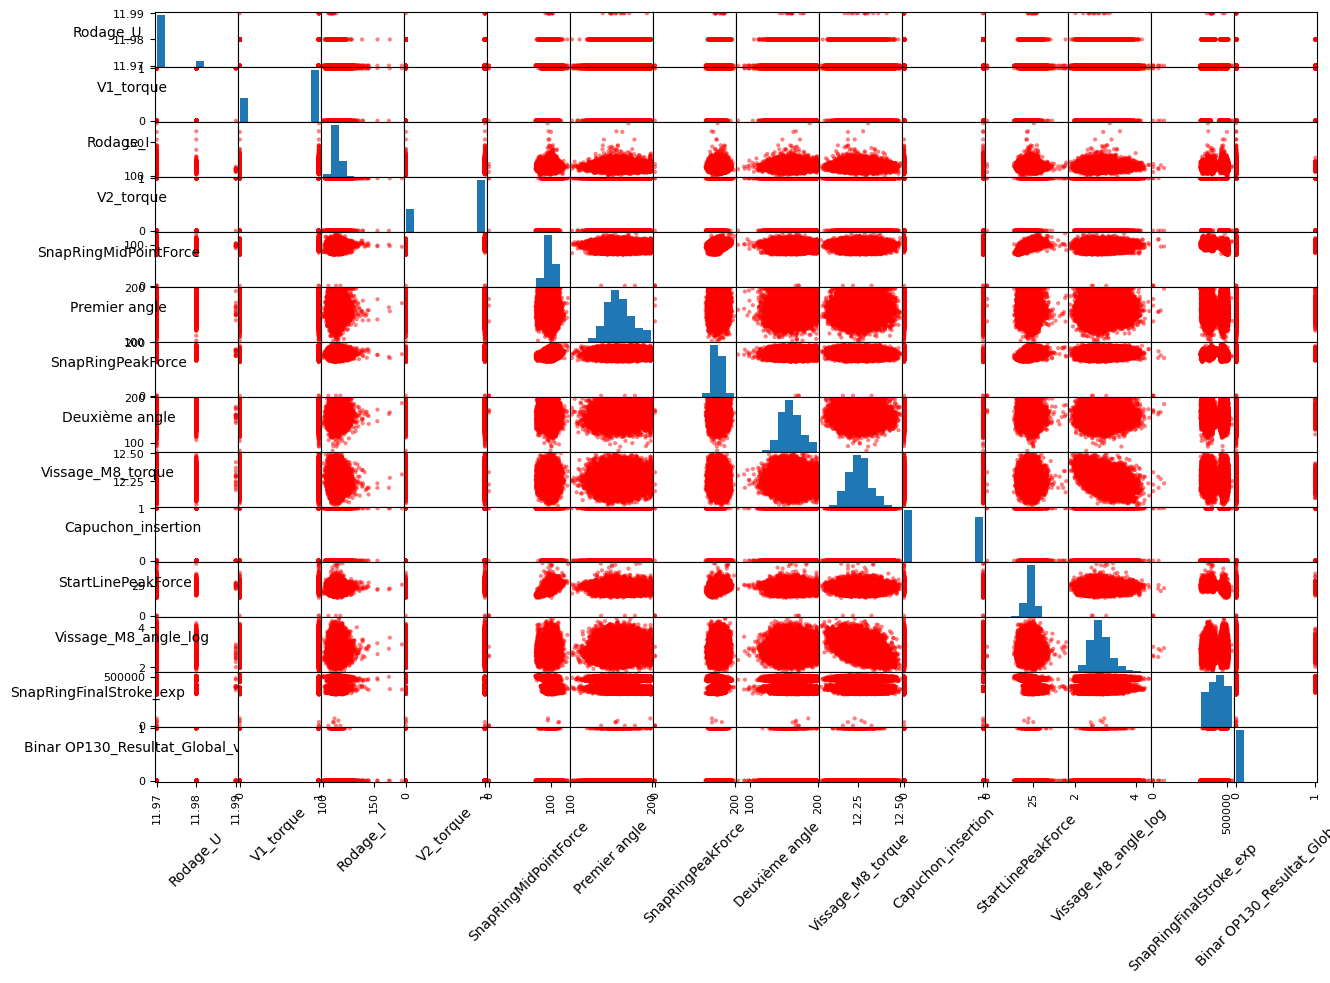

In [ ]:
sm = scatter_matrix(df_training_inputs[cols_to_plot2],figsize = (15, 10), alpha = 0.5, color = 'red')

visualization.rotate_labels(sm)
plt.show()

Visu sur Correlation Pearson

In [ ]:
corrmatrix = df_training_inputs.corr()
corrmatrix

,Premier angle,SnapRingPeakForce,Deuxième angle,Rodage_I,SnapRingFinalStroke,Vissage_M8_torque,Capuchon_insertion,Rodage_U,V1_torque,StartLinePeakForce,Vissage_M8_angle,SnapRingMidPointForce,V2_torque,Vissage_M8_angle_log,SnapRingFinalStroke_exp,Binar OP130_Resultat_Global_v
Premier angle,1.000000,0.008887,0.186781,0.035003,-0.087910,-0.017578,-0.086510,-0.007284,0.029245,0.057592,0.014374,0.066924,0.083662,0.021449,-0.112748,-0.012793
SnapRingPeakForce,0.008887,1.000000,0.038399,0.055235,0.076451,-0.134780,-0.518705,0.135288,0.491583,0.336620,0.106753,0.345139,0.489280,0.107327,-0.012354,-0.007290
Deuxième angle,0.186781,0.038399,1.000000,0.036301,-0.060931,-0.030284,-0.121070,0.003245,0.071833,0.047190,0.017727,0.050193,0.044249,0.023336,-0.073238,-0.006342
Rodage_I,0.035003,0.055235,0.036301,1.000000,0.060014,-0.046313,-0.068255,-0.118751,0.037032,0.002962,0.025043,0.046556,0.038527,0.027576,0.076714,0.003763
SnapRingFinalStroke,-0.087910,0.076451,-0.060931,0.060014,1.000000,-0.095903,0.131917,-0.022536,-0.415244,-0.381450,0.022764,-0.081412,-0.425514,0.031721,0.795896,0.015148
Vissage_M8_torque,-0.017578,-0.134780,-0.030284,-0.046313,-0.095903,1.000000,0.104997,-0.031115,-0.076199,0.009997,-0.445953,-0.057760,-0.074945,-0.515324,-0.128840,-0.002984
Capuchon_insertion,-0.086510,-0.518705,-0.121070,-0.068255,0.131917,0.104997,1.000000,-0.189151,-0.681892,-0.350268,-0.043183,-0.249981,-0.689374,-0.043100,0.188305,0.033914
Rodage_U,-0.007284,0.135288,0.003245,-0.118751,-0.022536,-0.031115,-0.189151,1.000000,0.171555,0.087487,0.013814,0.057027,0.175152,0.014373,-0.038234,-0.010492
V1_torque,0.029245,0.491583,0.071833,0.037032,-0.415244,-0.076199,-0.681892,0.171555,1.000000,0.572020,0.116466,0.350925,0.953855,0.108191,-0.568716,-0.039466
StartLinePeakForce,0.057592,0.336620,0.047190,0.002962,-0.381450,0.009997,-0.350268,0.087487,0.572020,1.000000,0.043943,0.620728,0.579126,0.037062,-0.592980,0.010720


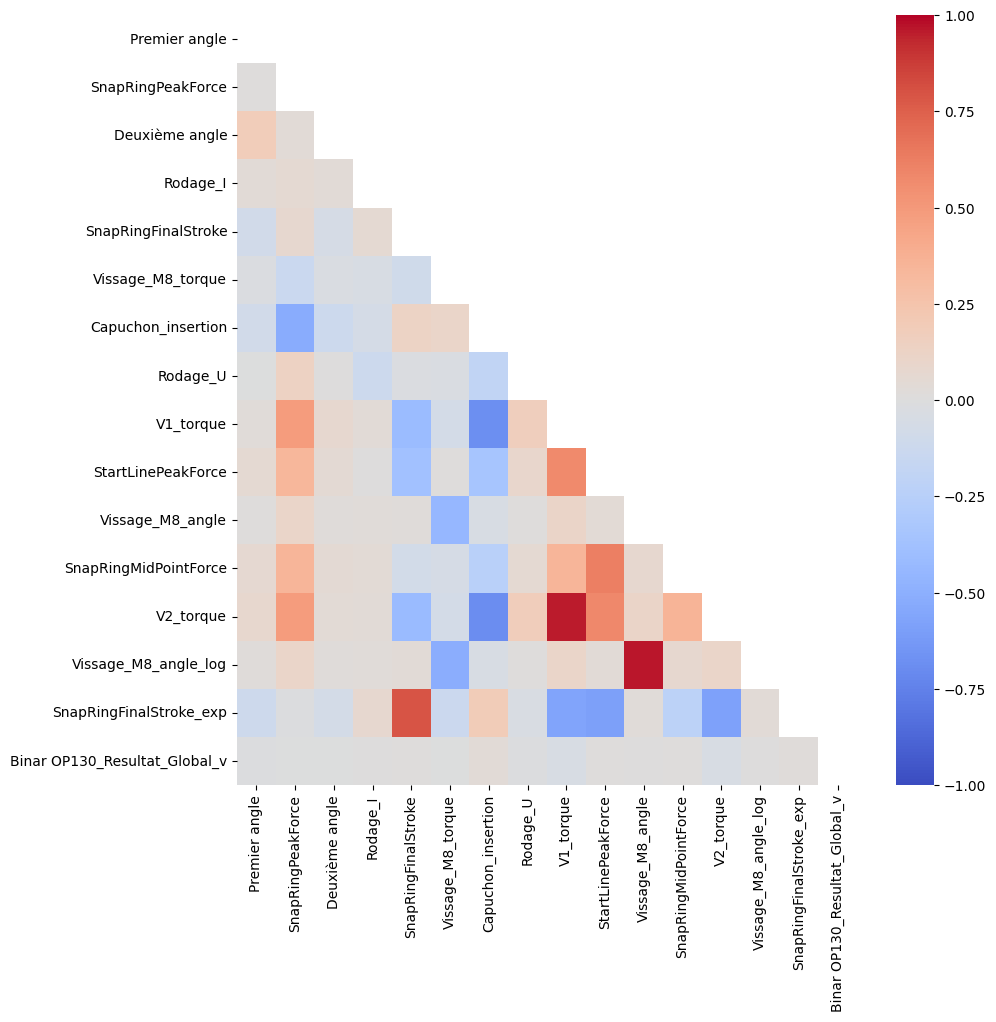

In [ ]:
visualization.plot_corr(df_training_inputs, width=10, height=10, 
                        print_value=False)

In [ ]:

features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df_training_inputs, target_feature='Binar OP130_Resultat_Global_v')

features_corr[:12]
     

Binar OP130_Resultat_Global_v    1.00
V1_torque                       -0.04
V2_torque                       -0.04
Capuchon_insertion               0.03
SnapRingFinalStroke              0.02
SnapRingFinalStroke_exp          0.02
Premier angle                   -0.01
SnapRingPeakForce               -0.01
Deuxième angle                  -0.01
Rodage_U                        -0.01
StartLinePeakForce               0.01
Vissage_M8_angle                 0.01
Name: Binar OP130_Resultat_Global_v, dtype: float64

In [ ]:
cols_binaire = ['Binar OP130_Resultat_Global_v', 'Capuchon_insertion', 'V1_torque', 'V2_torque']

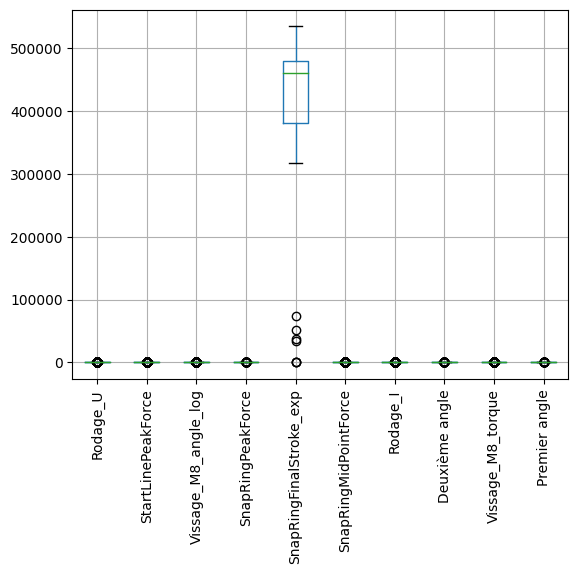

In [ ]:
ax = df_training_inputs[ list(set(cols_to_plot2) - set(cols_binaire))].boxplot()
ax.tick_params(axis='x', labelrotation=90)

# Df_fail

In [63]:
df_fail = df_training_inputs[df_training_inputs['Binar OP130_Resultat_Global_v'] == 1]
df_fail.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 40 to 34498
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Premier angle                  305 non-null    float64
 1   SnapRingPeakForce              305 non-null    float64
 2   Deuxième angle                 305 non-null    float64
 3   Rodage_I                       305 non-null    float64
 4   SnapRingFinalStroke            305 non-null    float64
 5   Vissage_M8_torque              305 non-null    float64
 6   Capuchon_insertion             305 non-null    float64
 7   Rodage_U                       305 non-null    float64
 8   V1_torque                      305 non-null    int64  
 9   StartLinePeakForce             305 non-null    float64
 10  Vissage_M8_angle               305 non-null    float64
 11  SnapRingMidPointForce          305 non-null    float64
 12  V2_torque                      305 non-null    

In [ ]:
sm = scatter_matrix(df_fail[cols_to_plot2] ,figsize = (15, 10), alpha = 0.5, color = 'red')

visualization.rotate_labels(sm)
plt.show()

# jsp